# Assignment 4: Block Matching and Harris Corner Detection
## Ex. 4.1 Dense Optical Flow by Block Matching
* implement the block matching method as shown in the lecture
* take two frames from the datasets "lane_detection" or "racecar" with variable distances in time (1, 2, x) and compute the vector flow field
* display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

/usr/local/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


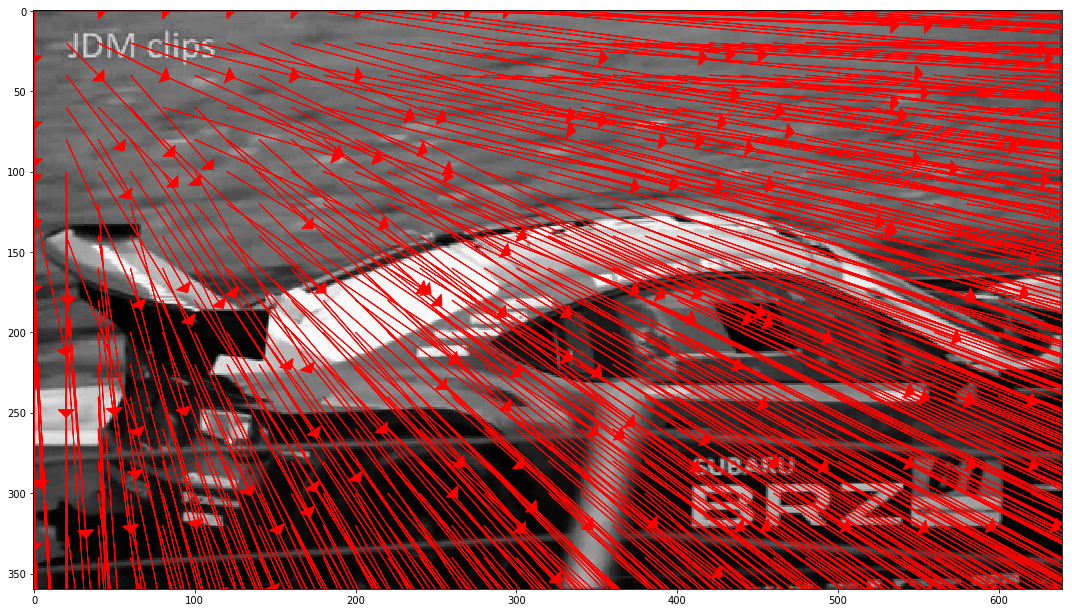

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

car1 = io.imread('images/racecar/100.jpeg')
car2 = io.imread('images/racecar/102.jpeg') 
fig = plt.figure(figsize=(15, 10))

def blockMatching(image1, image2, b):
    image1_gray = color.rgb2gray(image1)
    image2_gray = color.rgb2gray(image2)
    for y in range(0, image1_gray.shape[0], b):
        for x in range(0, image1_gray.shape[1], b):
            template = getSubImage(image1_gray, x, y, b)
            (u, v) = findMotion(template, x, y, image2_gray, b)
            plt.arrow(x, y, u, v, head_width=10, head_length=5, color='red')


def getSubImage(image, x, y, b):
    return image[y:(y + b), x:(x + b)]


def findMotion(template, x, y, image2, b):
    l = []
    b2 = int(round(b * 1.5))
    for j in range(max(y - b2, 0), min(y + b2, image2.shape[0] - b)):
        for i in range(max(x - b2, 0), min(x + b2, image2.shape[1] - b)):
            score = ssd(template, getSubImage(image2, i, j, b))
            l.append([score, i, j])
    l = np.array(l)
    best = l.argmin(axis=0)
    return (l[best[0]][1], l[best[0]][2])


def ssd(image1, image2):
    err = 0
    for y in range(image1.shape[0]):
        for x in range(image1.shape[1]):
            err += (image1[y, x] - image2[y, x])**2
    return err


blockMatching(car1, car2, 20)
io.imshow(color.rgb2gray(car1))

## Ex. 4.2 Harris Corner Detection
* implement the Harris Corner Detector as discussed in the lecture
* compute corners in the first image and track them with Lucas-Kanade (use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* mark the positions of your Harris corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the first image (**RESULT**)